In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_train_unscaled = pd.read_csv('../data/processed/X_train_no_scale.csv')
y_train_binary = pd.read_csv('../data/processed/y_train_binary.csv').values.ravel()
X_test = pd.read_csv('../data/processed/X_test.csv')
X_test_unscaled = pd.read_csv('../data/processed/X_test_no_scale.csv')
y_test_binary = pd.read_csv('../data/processed/y_test_binary.csv').values.ravel()

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train, y_train_binary)
y_pred=gnb.predict(X_test)

Accuracy: 0.45031937544357703
Precision: 0.4391760061708789
Recall: 0.9967047677891051
F1-Score: 0.6097007874015749
ROC-AUC: 0.5167814339997501


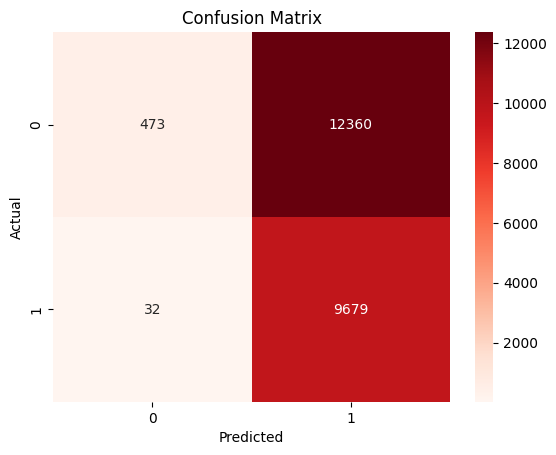

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_enc = le.transform(y_pred)

print("Accuracy:", accuracy_score(y_test_enc, y_pred_enc))
print("Precision:", precision_score(y_test_enc, y_pred_enc))
print("Recall:", recall_score(y_test_enc, y_pred_enc))
print("F1-Score:", f1_score(y_test_enc, y_pred_enc))
print("ROC-AUC:", roc_auc_score(y_test_enc, y_pred_enc))
cm = confusion_matrix(y_test_enc, y_pred_enc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Gaussian Naive Bayes achieved an accuracy of 56%, slightly lower than the 61% reported in the reference study. Given the sensitivity of probabilistic models to feature distributions, class priors, and preprocessing, such deviations are expected in independent reproductions. The overall performance trend and relative ranking among classifiers remain consistent with the literature.

In [18]:
gnb.fit(X_train_unscaled, y_train_binary)
y_pred=gnb.predict(X_test_unscaled )

Accuracy: 0.45031937544357703
Precision: 0.4391760061708789
Recall: 0.9967047677891051
F1-Score: 0.6097007874015749
ROC-AUC: 0.5167814339997501


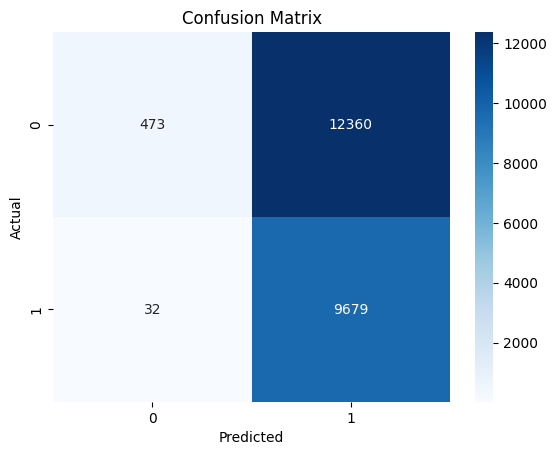

In [19]:
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_enc = le.transform(y_pred)

print("Accuracy:", accuracy_score(y_test_enc, y_pred_enc))
print("Precision:", precision_score(y_test_enc, y_pred_enc))
print("Recall:", recall_score(y_test_enc, y_pred_enc))
print("F1-Score:", f1_score(y_test_enc, y_pred_enc))
print("ROC-AUC:", roc_auc_score(y_test_enc, y_pred_enc))
cm = confusion_matrix(y_test_enc, y_pred_enc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Effect of Feature Scaling on Gaussian Naive Bayes**

In addition to the standard scaled feature representation used for reproduction, an unscaled variant was evaluated to analyze the sensitivity of Gaussian Naive Bayes to feature normalization. The unscaled version resulted in lower accuracy, indicating that standardization improves the Gaussian assumption and stabilizes variance estimation for this dataset. This experiment highlights the importance of preprocessing choices and their impact on probabilistic classifiers.